In [68]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    #train_errors=train_errors[12:]
    #val_errors = val_errors[12:]
    plt.plot(np.sqrt(train_errors), "r-",linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd

def load_res_data(res_path = RES_PATH,file_name="new_feature_1214.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [72]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["LUT"])
#resource_origin_data_lut=resource_origin_data_lut.drop("FF",axis=1)
#resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
#resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
#resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)




In [73]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 229
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ModuleName                 212 non-null    object 
 1   ARITLSHIFT                 212 non-null    int64  
 2   ARITLSHIFT_PORT_NUM        212 non-null    int64  
 3   ARITLSHIFT_PORT_WIDTH      212 non-null    int64  
 4   ARITLSHIFT_VALUE           212 non-null    int64  
 5   ARITRSHIFT                 212 non-null    int64  
 6   ARITRSHIFT_PORT_NUM        212 non-null    int64  
 7   ARITRSHIFT_PORT_WIDTH      212 non-null    int64  
 8   ARITRSHIFT_VALUE           212 non-null    int64  
 9   AlwaysConstructs           212 non-null    int64  
 10  AssignLHSPortNum           212 non-null    int64  
 11  AssignLHSWidth             212 non-null    int64  
 12  AssignRHSPortNum           212 non-null    int64  
 13  AssignRHSWidth             212 non-null    int64  

In [85]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["LUT"].sort_values(ascending=False)


LUT                      1.000000
CONDITIONALELSE          0.431417
NonBlockLeftWidth        0.417203
PLUS                     0.399622
NonBlockingAssign        0.393835
                           ...   
ARITLSHIFT                    NaN
ARITLSHIFT_PORT_NUM           NaN
ARITLSHIFT_PORT_WIDTH         NaN
ARITLSHIFT_VALUE              NaN
INOUT                         NaN
Name: LUT, Length: 63, dtype: float64

In [82]:
#特征优化
resource_lut = resource_origin_data_lut["LUT"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("LUT",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [51]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [52]:
X_train_full

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONIF,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH
140,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,2,11,...,5,5,3,0,0,2,22,0,2,2
80,0,0,0,0,0,0,0,0,4,1,...,0,0,1,0,0,12,83,0,4,18
95,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,32,0,0,0
109,0,0,0,0,0,0,0,0,5,5,...,1,1,5,0,0,7,64,1,4,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,8,0,0,0
17,0,0,0,0,0,0,0,0,9,21,...,0,0,55,0,0,11,139,0,35,346
104,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2,2,0,0,0
195,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [54]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_full,y_train_full)
forest_predic = forest_reg.predict(X_valid)
forest_mse = mean_squared_error(y_valid,forest_predic)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

15.251782206192042

In [55]:
from sklearn.metrics import r2_score
r2_score(y_valid,forest_predic)

0.9268125279275852

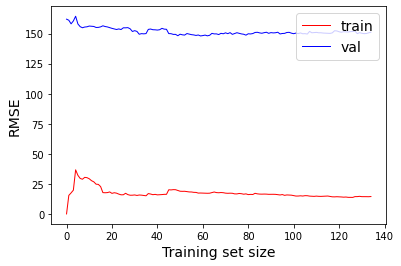

In [56]:
plot_learning_curves(forest_reg, X_train_full, y_train_full)
#plt.axis([0, 200, 0, 250])                         # not shown in the book
plt.show()    

In [57]:
#随机森林贡献度分析
feature_importance = forest_reg.feature_importances_
sorted(zip(feature_importance, resource_label), reverse=True)

[(0.1498709495398286, 'REGWIDTH'),
 (0.1322949873323349, 'NonBlockRightWidth'),
 (0.09004232002559581, 'PLUS'),
 (0.07825285458922467, 'NonBlockLeftWidth'),
 (0.04749206002185161, 'CASEITEMNUM'),
 (0.046884718284176424, 'AssignRHSWidth'),
 (0.04568701146860615, 'OUTPUTWIDTH'),
 (0.04340905256748948, 'MIN'),
 (0.03517975138900473, 'BlockAssign_Left_Width'),
 (0.03459796799269837, 'REDAND'),
 (0.031777389748849964, 'AssignLHSWidth'),
 (0.024577101487372993, 'CASECONDITIONNUM'),
 (0.02174606865698909, 'REG'),
 (0.021326451543742457, 'INPUTWIDTH'),
 (0.01635407681891477, 'INPUT'),
 (0.016062142465784357, 'CONDITIONALIF'),
 (0.014231767342865794, 'NonBlockingRightPortNum'),
 (0.013632111532035165, 'NonBlockingAssign'),
 (0.013491425912223942, 'CONDITIONALTHEN'),
 (0.01228546701369886, 'CONDITIONALELSE'),
 (0.011759519138423206, 'AssignRHSPortNum'),
 (0.011158334442180073, 'OUTPUT'),
 (0.010822348488360063, 'BLOCKINGASSIGN'),
 (0.007896726326140857, 'AssignLHSPortNum'),
 (0.00706535281175925

In [58]:
#随机搜索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=100),
    }

forest_reg = RandomForestRegressor(random_state=10)
forest_rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=10, scoring='neg_mean_squared_error', random_state=42)
forest_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=10),
                   n_iter=100,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130B0A6F7C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [63]:
#随机森林mse
forest_predict = forest_rnd_search.best_estimator_.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_predict)
forest_mse

5788.630902531727

In [64]:
#随机森林rmse
forest_rmse = np.sqrt(forest_mse)
forest_rmse

76.0830526630716

In [65]:
#随机森林R方评估
from sklearn.metrics import r2_score
r2_score(y_valid,forest_predict)

0.04066686671625985

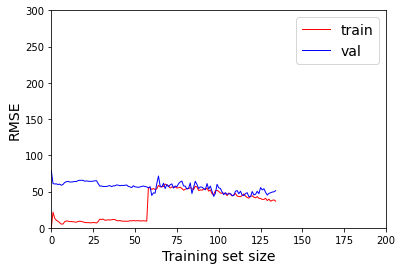

In [66]:
plot_learning_curves(forest_rnd_search.best_estimator_, X_train_full, y_train_full)
plt.axis([0, 200, 0, 300])                         # not shown in the book
plt.show()    

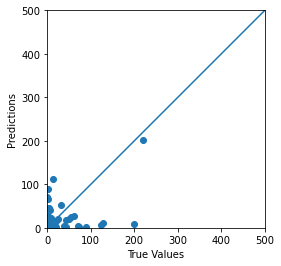

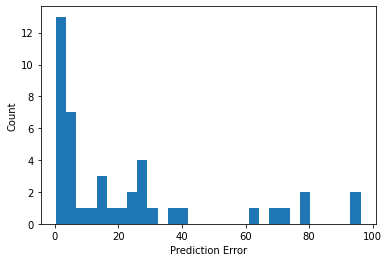

In [67]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_valid,forest_predic)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,500]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(forest_predict,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)
